# Dowdle's Titanic Fare Prediction
**Author:** Brittany Dowdle   
**Date:** April 3, 2025   
**Objective:** Use the data you inspected, explored, and cleaned previously. Select a numeric target and build and evaluate different models for predicting a continuous variable using regression.

### Introduction
This project uses the Titanic dataset to predict fare - the amount of money paid for the journey - based on features such as age, family size, and embark_town. I will train a linear regression model, evaluate performance using key metrics, and create visualizations to interpret the results.   
There will be 4 different cases tested: case 1 - age, case 2 - family_size, case 3 - age and family_size, and case 4 - embark_town.   
And there will be comparisons to alternative models: ridge regression, elastic net, and polynomial regression.

****

## Imports
In the code cell below, import the necessary Python libraries for this notebook. All imports should be at the top of the notebook.

In [42]:
# Import pandas for data manipulation and analysis (we might want to do more with it)
import pandas as pd

# Import pandas for data manipulation and analysis  (we might want to do more with it)
import numpy as np

from pandas.plotting import scatter_matrix

# Import matplotlib for creating static visualizations
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Import seaborn for statistical data visualization (built on matplotlib)
import seaborn as sns

# Import train_test_split for splitting data into training and test sets
from sklearn.model_selection import train_test_split

# Imports for building a regression models
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures

# Import performance metrics for model evaluation
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

****

## Section 1. Import and Inspect the Data
Load the Titanic dataset and confirm it’s structured correctly.

*Important: This code requires importing seaborn as sns and pandas. Our variable titanic holds a pandas DataFrame object. Know what imports are required for each bit of code.*

In [43]:
# Load the data
titanic = sns.load_dataset('titanic')

# Confirm the data
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


****

## Section 2. Data Exploration and Preparation
Prepare the Titanic data for regression modeling.

- Impute missing values for age using median.
- Drop rows with missing fare (or impute if preferred).
- Create numeric variables (e.g., family_size from sibsp + parch + 1).
- Optional - convert categorical features (e.g. sex, embarked) if you think they might help your prediction model. (We do not know relationships until we evaluate things.)

In [44]:
# Check missing values in fare
missing_count = titanic['fare'].isnull().sum()
print(f"Missing values in fare: {missing_count}")

# Check missing values in embark_town
missing_count_1 = titanic['embark_town'].isnull().sum()
print(f"Missing values in embark_town: {missing_count_1}", "\n")

# Check values in embark_town
print(titanic['embark_town'].unique())

Missing values in fare: 0
Missing values in embark_town: 2 

['Southampton' 'Cherbourg' 'Queenstown' nan]


In [45]:
# Impute median for missing age values
titanic.fillna({'age': titanic['age'].median()}, inplace=True)

# Create numeric variables for family_size
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

# Drop missing values in embark_town
titanic.dropna(subset=['embark_town'], axis=0, inplace=True)

# Convert embark_town to numeric variables
titanic['embark_town'] = titanic['embark_town'].map({'Southampton': 0, 'Cherbourg': 1, 'Queenstown': 2})

# Confirm numeric variables
print(titanic['embark_town'].value_counts())

embark_town
0    644
1    168
2     77
Name: count, dtype: int64


****

## Section 3. Feature Selection and Justification
Define multiple combinations of features to use as inputs to predict fare. Use unique names (X1, y1, X2, y2, etc.) so results are visible and can be compared at the same time. 

*Remember the inputs, usually X, are a 2D array. The target is a 1D array.*

In [46]:
# Case 1. age
X1 = titanic[['age']]
y1 = titanic['fare']
print("Case 1 columns:", X1.columns.tolist())

# Case 2. family_size
X2 = titanic[['family_size']]
y2 = titanic['fare']
print("Case 2 columns:", X2.columns.tolist())

# Case 3. age, family_size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']
print("Case 3 columns:", X3.columns.tolist())

# Case 4. embark_town
X4 = titanic[['embark_town']]
y4 = titanic['fare']
print("Case 4 columns:", X4.columns.tolist())

Case 1 columns: ['age']
Case 2 columns: ['family_size']
Case 3 columns: ['age', 'family_size']
Case 4 columns: ['embark_town']


### Reflection Questions

1) Why might these features affect a passenger’s fare: **Age - children might have had discounted fair or older passengers might have booked more expensive accomodations. Family size - a large family might have had discounted group pricing or booked less expensive accomodations to fit budget. Age & family size - using both can capture socio-economic factors that influence how much someone is willing or able to pay. Embark Town - the location a passenger boards from might have variation in tickets due to economic conditions or class distributions.**   
2) List all available features: **Survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone.**   
3) Which other features could improve predictions and why: **Pclass - this is a direct indicator of travel class, which is a strong predictor of fare since higher classes typically cost more. Sex - a previous scatterplot in lab02 showed a higher number of female passengers in a higher fare category.**   
4) How many variables are in your Case 4: **One variable.**   
5) Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs: **embark_town - the town may reflect regional pricing strategies or differences in the passenger demographics boarding from various ports. It might identify geographic factors that are potentially a valuable predictor for understanding fare variations.**

****

## Section 4. Train a Regression Model (Linear Regression)
 

### 4.1 Split the Data

In [47]:
# Split data into a training set and a test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=44)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=44)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=44)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=44)

# Show set sizes - should be the same for all 4
print('Train size:', len(X1_train))
print('Test size:', len(X1_test))

Train size: 711
Test size: 178


### 4.2 Train and Evaluate Linear Regression Models (all 4 cases)
We'll use a more concise approach - create each model and immediately call the fit() method. 

In [48]:
# Create the models
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Train each model
y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)

y_pred_train3 = lr_model3.predict(X3_train)
y_pred_test3 = lr_model3.predict(X3_test)

y_pred_train4 = lr_model4.predict(X4_train)
y_pred_test4 = lr_model4.predict(X4_test)

### 4.3 Report Performance

In [49]:
# Case 1 - age
print("Case 1: Training R²:", r2_score(y1_train, y_pred_train1))
print("Case 1: Test R²:", r2_score(y1_test, y_pred_test1))
print("Case 1: Test RMSE:", root_mean_squared_error(y1_test, y_pred_test1))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y_pred_test1))

Case 1: Training R²: 0.009576337621798325
Case 1: Test R²: 0.002941289729790575
Case 1: Test RMSE: 42.01273104130315
Case 1: Test MAE: 26.443088816475168


In [50]:
# Case 2 - family_size
print("Case 2: Training R²:", r2_score(y2_train, y_pred_train2))
print("Case 2: Test R²:", r2_score(y2_test, y_pred_test2))
print("Case 2: Test RMSE:", root_mean_squared_error(y2_test, y_pred_test2))
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y_pred_test2))

Case 2: Training R²: 0.05077197364966568
Case 2: Test R²: 0.029087338420513142
Case 2: Test RMSE: 41.458217941500294
Case 2: Test MAE: 25.903384409771792


In [51]:
# Case 3. age, family_size
print("Case 3: Training R²:", r2_score(y3_train, y_pred_train3))
print("Case 3: Test R²:", r2_score(y3_test, y_pred_test3))
print("Case 3: Test RMSE:", root_mean_squared_error(y3_test, y_pred_test3))
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y_pred_test3))

Case 3: Training R²: 0.07634313395610726
Case 3: Test R²: 0.03594795449810373
Case 3: Test RMSE: 41.31148324260097
Case 3: Test MAE: 24.409132140907147


In [52]:
# Case 4. embark_town
print("Case 4: Training R²:", r2_score(y4_train, y_pred_train4))
print("Case 4: Test R²:", r2_score(y4_test, y_pred_test4))
print("Case 4: Test RMSE:", root_mean_squared_error(y4_test, y_pred_test4))
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y_pred_test4))

Case 4: Training R²: 0.0043824615703143
Case 4: Test R²: 0.0008776107932371158
Case 4: Test RMSE: 42.056186843348975
Case 4: Test MAE: 27.146512445553572


### Reflection Questions

Compare the train vs test results for each.
| Case | Feature(s) Used | Train R² | Test R² | Test RMSE | Test MAE |
|-------|-----------|---------------|----------|-----------|--------|
| 1 | age | 0.0096 | 0.0029 | 42.01 | 26.44 |
| 2 | family_size | 0.0508 | 0.0291 | 41.46 | 25.90 |
| 3 | age, family_size | 0.0763 | 0.0359 | 41.31 | 24.41 |
| 4 | embark_town | 0.0044 | 0.0009 | 42.06 | 27.15 |

Did Case 1 overfit or underfit? Explain: **Underfitting - very low R² scores on both train (0.0096) and test (0.0029) suggests that the model is not capturing much of the relationship.**   
Did Case 2 overfit or underfit? Explain: **Underfitting - still low R² scores, but they are slightly better than Case 1. This suggests family_size is a better predictor, but still weak.**   
Did Case 3 overfit or underfit? Explain: **Underfitting - improvement in both train (0.0763) and test R² (0.0359) over Cases 1 and 2. Suggests that combining age and family_size helps a bit, but model is too simple or features lack strong predictive power.**   
Did Case 4 overfit or underfit? Explain: **Underfitting - lowest R² values and highest test MAE. embark_town appears to be the worst predictor of fare out of the four cases.**   

Adding Age   
Did adding age improve the model: **Yes, R², RMSE, and MAE all improved.**
Propose a possible explanation (consider how age might affect ticket price, and whether the data supports that): **As pointed out earlier a possible explanation is that children may pay discounted rates compared to full price for adults. Or older passengers may have chosen higher-class tickets.**   

Worst   
Which case performed the worst: **Case 4.**   
How do you know: **Lowest R², highest MAE, and highest RMSE.**    
Do you think adding more training data would improve it (and why/why not): **Not likely, the feature embark_town just doesn't correlate well with fare. Adding more data would just reinforce the same weak pattern.**   

Best   
Which case performed the best: **Case 3.**   
How do you know: **Highest R² scores, lowest MAE, and lowest RMSE.**   
Do you think adding more training data would improve it (and why/why not): **Adding more data might help uncover deeper patterns or reduce noise. It could be that it relates to fare in a non-linear or interacted way.**   

****

## Section 5. Compare Alternative Models
Choose the best case model from the four cases. Use that model to continue to explore additional continuous prediction models.

### 5.1 Ridge Regression (L2 penalty)
- Penalty term: L2 = sum of squared weights.
- Effect: Shrinks weights, helps reduce overfitting, keeps all features.

In [53]:
# Create the model
ridge_model = Ridge(alpha=1.0)
# Train the model
ridge_model.fit(X3_train, y3_train)
y_pred_ridge = ridge_model.predict(X3_test)

# Confirm the model
print("Intercept:", ridge_model.intercept_)
print("Coefficients:", ridge_model.coef_)

Intercept: -2.6693611214357773
Coefficients: [0.65114642 8.23344936]


### 5.2 Elastic Net (L1 + L2 combined)
- Penalty term: α × (L1 + L2).
- Effect: Shrinks weights and can drop some features — flexible and powerful.

In [54]:
# Create the model
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
# Train the model
elastic_model.fit(X3_train, y3_train)
y_pred_elastic = elastic_model.predict(X3_test)

# Confirm the model
print("Intercept:", elastic_model.intercept_)
print("Coefficients:", elastic_model.coef_)

Intercept: -1.184526515605576
Coefficients: [0.63350244 7.73088055]


### 5.3 Polynomial Regression
Polynomial regression adds interaction and nonlinear terms to the model.    
*Be careful here - higher-degree polynomials can easily overfit.*

In [55]:
# Set up the poly inputs
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X3_train)
X_test_poly = poly.transform(X3_test)

# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y3_train)
y_pred_poly = poly_model.predict(X_test_poly)

# Confirm the model
print("Intercept:", poly_model.intercept_)
print("Coefficients:", poly_model.coef_)

Intercept: -63.85671654767586
Coefficients: [ 0.00000000e+00  3.25895562e+00  4.49732553e+01 -4.42765619e-02
 -8.11851337e-01 -5.72553591e+00  1.21487994e-04  1.13747991e-02
  3.12119416e-02  2.38435323e-01]


### 5.4 Visualize Polynomial Cubic Fit (for 1 input feature)
Choose a case with just one input feature and plot it.

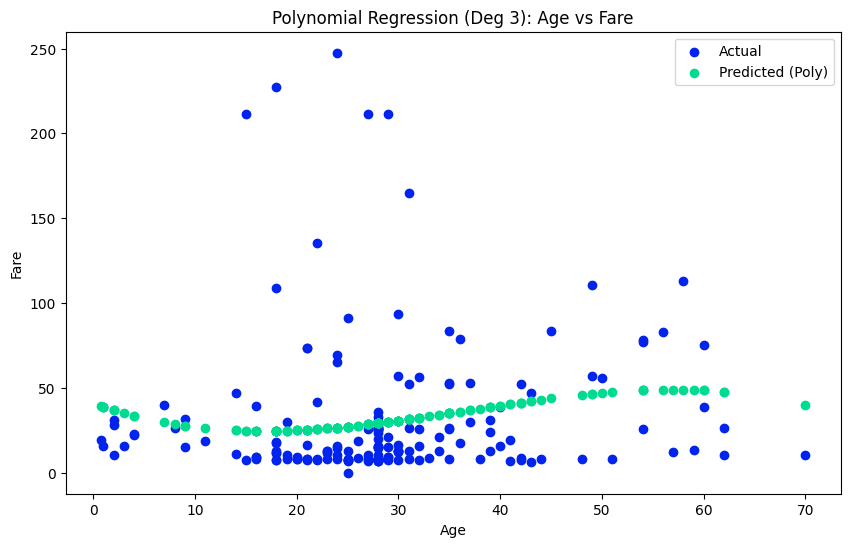

In [56]:
# Only 1 feature: Case 1 - age
X_case1_train = X1_train.copy()
X_case1_test = X1_test.copy()
y_case1_train = y1_train.copy()
y_case1_test = y1_test.copy()

# Set up the poly inputs
poly_case1 = PolynomialFeatures(degree=3)
X_case1_train_poly = poly_case1.fit_transform(X_case1_train)
X_case1_test_poly = poly_case1.transform(X_case1_test)

# Use the poly inputs in the LR model
poly_model_case1 = LinearRegression()
poly_model_case1.fit(X_case1_train_poly, y_case1_train)
y_pred_case1_poly = poly_model_case1.predict(X_case1_test_poly)
y_pred_case1_train_poly = poly_model_case1.predict(X_case1_train_poly)

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(X_case1_test, y_case1_test, color='#0024ED', label='Actual')
plt.scatter(X_case1_test, y_pred_case1_poly, color='#00DB92', label='Predicted (Poly)')
# Create the legend
plt.legend()
# Create the title and labels
plt.title("Polynomial Regression (Deg 3): Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
# Show the plot
plt.tight_layout
plt.show()


In [57]:
# Create metrics to compare linear regression and polynomial fit
# Calculate R² scores
r2_train = r2_score(y_case1_train, y_pred_case1_train_poly)
r2_test = r2_score(y_case1_test, y_pred_case1_poly)

# Calculate RMSE (Root Mean Squared Error)
rmse_test = root_mean_squared_error(y_case1_test, y_pred_case1_poly)

# Calculate MAE (Mean Absolute Error)
mae_test = mean_absolute_error(y_case1_test, y_pred_case1_poly)

# Print results
print(f"Case 1 Polynomial(3) Training R²: {r2_train:.4f}")
print(f"Case 1 Polynomial(3) Test R²: {r2_test:.4f}")
print(f"Case 1 Polynomial(3) Test RMSE: {rmse_test:.4f}")
print(f"Case 1 Polynomial(3) Test MAE: {mae_test:.4f}")

Case 1 Polynomial(3) Training R²: 0.0188
Case 1 Polynomial(3) Test R²: -0.0019
Case 1 Polynomial(3) Test RMSE: 42.1155
Case 1 Polynomial(3) Test MAE: 25.6950


### Reflection Questions

1) What patterns does the cubic model seem to capture: **There is a subtle pattern of a general upward trend in fare prices as age increases. The model seems to over-smooth the data and does not capture the sharp variations in certain age groups.**
2) Where does it perform well or poorly: **It performs well in capturing the trend of fares increasing slightly with age. It does an okay job of following the lower fare data points. The model does not seem to capture extreme outliers well and struggles to account for variability.**
3) Did the polynomial fit outperform linear regression: **The polynomial regression does not significantly improve predictive power. The slight training R² improvement implys overfitting, not better performance. Linear regression is likely a better model for this dataset.**   
 

    | Case | Model | Training R² | Test R²  | Test RMSE | Test MAE  |
    |------|----------------------|------------|---------|----------|----------|
    | 1 | Linear Regression | 0.0096 | 0.0029  | 42.0127  | 26.4431  |
    | 1 | Polynomial (Deg 3) | 0.0188 | -0.0019 | 42.1155  | 25.6950  |


1) Where (on the graph or among which kinds of data points) does it fit best: **It fits best at mid-range fare levels and it's low fare predictions seem reasonable. This is where fares are relatively stable.**

### 5.5 Compare All Models
Create a summary table or printout comparing all models:

In [58]:
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {root_mean_squared_error(y_true, y_pred):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

print("Case 1 Model Comparisons:", "\n")
report("Linear", y3_test, y_pred_test3)
report("Ridge", y3_test, y_pred_ridge)
report("ElasticNet", y3_test, y_pred_elastic)
report("Polynomial", y3_test, y_pred_poly)

Case 1 Model Comparisons: 

Linear R²: 0.036
Linear RMSE: 41.31
Linear MAE: 24.41

Ridge R²: 0.036
Ridge RMSE: 41.31
Ridge MAE: 24.41

ElasticNet R²: 0.038
ElasticNet RMSE: 41.27
ElasticNet MAE: 24.45

Polynomial R²: 0.080
Polynomial RMSE: 40.36
Polynomial MAE: 23.44



### 5.5 Visualize Higher Order Polynomial (for the same 1 input case)
Use the same single input case as visualized above, but use a higher degree polynomial (e.g. 4, 5, 6, 7, or 8). Plot the result.

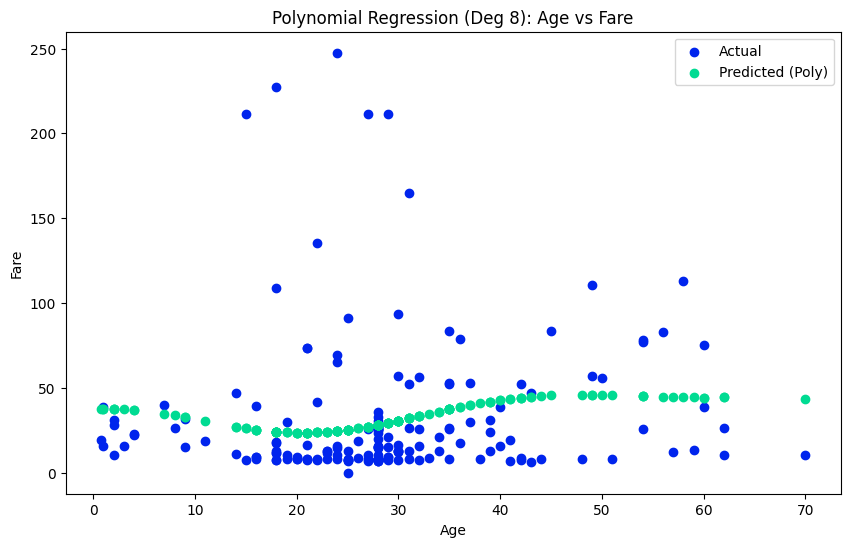

In [59]:
# Set up the poly inputs
poly8_case1 = PolynomialFeatures(degree=8)
X_case1_train_poly8 = poly8_case1.fit_transform(X_case1_train)
X_case1_test_poly8 = poly8_case1.transform(X_case1_test)

# Use the poly inputs in the LR model
poly8_model_case1 = LinearRegression()
poly8_model_case1.fit(X_case1_train_poly8, y_case1_train)
y_pred_case1_poly8 = poly8_model_case1.predict(X_case1_test_poly8)
y_pred_case1_train_poly8 = poly8_model_case1.predict(X_case1_train_poly8)

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(X_case1_test, y_case1_test, color='#0024ED', label='Actual')
plt.scatter(X_case1_test, y_pred_case1_poly8, color='#00DB92', label='Predicted (Poly)')
# Create the legend
plt.legend()
# Create the title and labels
plt.title("Polynomial Regression (Deg 8): Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
# Show the plot
plt.tight_layout
plt.show()

### Compare Degree 3 to Degree 8
Based on the scatter plots, the degree 3 model seems to perform better by providing a smoother and more consistent approximation of the actual data. The degree 8 model has flexibility that appears to overfit the training data and produce predictions with higher variability and less generalization.

**** 

## Section 6. Final Thoughts & Insights

### 6.1 Summarize Findings
1) What features were most useful? **Combining age and family size provided the best results. The R² scores of 0.0763 (training) and 0.0359 (testing) were higher then either feature on its own. This combination likely captures more socio-economic factors that influence fare, such as families with children or older passengers booking different types of accommodations.**

2) What regression model performed best?


    | Model | R² | RMSE | MAE |
    |----------------------|------------|---------|----------|
    | Linear | 0.036 | 41.31 | 24.41 |
    | Ridge | 0.036 | 41.31 | 24.41 |
    | Elastic | 0.038 | 41.27 | 24.45 |
    | Polynomial | 0.080 | 40.36 | 23.44 |


    **Polynomial performed the best, with the highest R² score and the lowest RMSE and MAE values. The polynomial terms likely captured some non-linear relationships between the features and fare. Ridge indicated that regularization did not significantly improve performance from linear. And elastic suggested that the combination of L1 and L2 penalties did not provide much benefit.**

1) How did model complexity or regularization affect results? **Increasing complexity with polynomial (degree 3) improved performance slightly but also showed signs of overfitting. Higher-degree polynomials (degree 8) overfit the training data, leading to poorer generalization on the test data. Ridge and elastic net did not outperform linear dramatically. This indicated that regularization helped prevent overfitting but did not significantily improve prediction.**

 

### 6.2 Discuss Challenges
1) Was fare hard to predict? Why? **The relationship between the features and fare might be more complex than what linear or polynomial models could capture. The models generally underfit the data, as evidenced by the low R² scores and high error metrics. The project overall indicates that the chosen features were not strong predictors of fare.**

2) Did skew or outliers impact the models? **Yes. Outliers distsort the overall trend and inflate error metrics. For linear regression, outliers bias the parameter estimates. Fare is right skewed where most values cluster at the lower end with a long tail on the higher end. This violates normality that many regression models rely on and complicates the interpretation of the coefficients.**
 

### 6.3 Optional Next Steps
1) Try different features besides the ones used (e.g., pclass, sex if you didn't use them this time)